In [1]:
import numpy as np 
import pandas as pd 
import joblib
import os
import functions_symbollic_regression as symbollic_reg
import importlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


# Define the xvars for general use

In [2]:
x_vars_log = {
    "log_metallicity_gas_half_light_visible_z500pc": {
        "symbol": r"$\log_{10}(Z_{\mathrm{gas}}(R_{50}))$"
    },
    "log_metalicity_star_half_light_visible_z500pc": {
        "symbol": r"$\log_{10}(Z_{\star}(R_{50}))$"
    },
    "log_sfr_10Myr": {
        "symbol": r"$\log_{10}(\mathrm{SFR}_{10\,\mathrm{Myr}})$"
    },
    "log_star_mass": {
        "symbol": r"$\log_{10}(M_\star)$"
    },
    "log_gas_mass": {
        "symbol": r"$\log_{10}(M_{\mathrm{gas}})$"
    }, 
    "log_Pgas_half_light_visible_z500pc": {
        "symbol": r"$\log_{10}(P_{\mathrm{gas}}(R_{50}))$"
    },
    "log_Pstar_half_light_visible_z500pc": {
        "symbol": r"$\log_{10}(P_{\mathrm{star}}(R_{50}))$"
    },
    "log_Ptotal_half_light_visible_z500pc": {
        "symbol": r"$\log_{10}(P_{\mathrm{tot}}(R_{50}))$"
    },
    "log_halo_mass": {
        "symbol": r"$\log_{10}(M_{\mathrm{halo}})$"
    },
    "log_h2_weighted_temperature_mass_average_half_light_visible_z500pc":{
        "symbol": "Th2"
    },
}


x_vars_linear = {
    "metallicity_gas_half_light_visible_z500pc": {
        "symbol": r"$Z_{\mathrm{gas}}(R_{50})$"
    },
    "metalicity_star_half_light_visible_z500pc": {
        "symbol": r"$Z_{\star}(R_{50})$"
    },
    "sfr_10Myr": {
        "symbol": r"$\mathrm{SFR}_{10\,\mathrm{Myr}}$"
    },
    "star_mass": {
        "symbol": r"$M_\star$"
    },
    "gas_mass": {
        "symbol": r"$M_{\mathrm{gas}}$"
    }, 
    "Pgas_half_light_visible_z500pc": {
        "symbol": r"$P_{\mathrm{gas}}(R_{50})$"
    },
    "Pstar_half_light_visible_z500pc": {
        "symbol": r"$P_{\mathrm{star}}(R_{50})$"
    },
    "Ptotal_half_light_visible_z500pc": {
        "symbol": r"$P_{\mathrm{tot}}(R_{50})$"
    },
    "halo_mass": {
        "symbol": r"$M_{\mathrm{halo}}$"
    },
    "h2_weighted_temperature_mass_average_half_light_visible_z500pc":{
        "symbol": "Th2"
    },
}


x_vars_ln = {
    "ln_metallicity_gas_half_light_visible_z500pc": {
        "symbol": r"$ln(Z_{\mathrm{gas}}(R_{50}))$"
    },
    "ln_metalicity_star_half_light_visible_z500pc": {
        "symbol": r"$ln(Z_{\star}(R_{50}))$"
    },
    "ln_sfr_10Myr": {
        "symbol": r"$ln(\mathrm{SFR}_{10\,\mathrm{Myr}})$"
    },
    "ln_star_mass": {
        "symbol": r"$ln(M_\star)$"
    },
    "ln_gas_mass": {
        "symbol": r"$ln(M_{\mathrm{gas}})$"
    }, 
    "ln_Pgas_half_light_visible_z500pc": {
        "symbol": r"$ln(P_{\mathrm{gas}}(R_{50}))$"
    },
    "ln_Pstar_half_light_visible_z500pc": {
        "symbol": r"$ln(P_{\mathrm{star}}(R_{50}))$"
    },
    "ln_Ptotal_half_light_visible_z500pc": {
        "symbol": r"$ln(P_{\mathrm{tot}}(R_{50}))$"
    },
    "ln_halo_mass": {
        "symbol": r"$ln(M_{\mathrm{halo}})$"
    },
    "ln_h2_weighted_temperature_mass_average_half_light_visible_z500pc":{
        "symbol": "$ln({\mathrm{T_{H2}}})$"
    },
}


x_vars = x_vars_ln.copy()


# Main

## Define the path to folder 

In [3]:
# Define path to file 
path_to_trained_model = "/scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/python_files/analyze_hden_metallicity_turbulence_isrf_radius/symbollic_regression"
path_to_trained_model = f"{path_to_trained_model}/outputs/z0_z1_z2_z3_linear_with_ln2"

### Read trained model

In [4]:
# Define the path to file 
print(f"Reading from: {path_to_trained_model}.")
files = os.listdir(path_to_trained_model)

# Length of the files have to be 3 maximum. Otherwise there is something unexpected happenning. 
if len(files) > 3:
    raise ValueError("Number of files have to be less than two. There is something wrong.")
else:
    excluded_files = {"options.txt", "used_data_df.csv"}
    dir_name = [name for name in files if name not in excluded_files][0]

path_to_trained_model_pkl = f"{path_to_trained_model}/{dir_name}/checkpoint.pkl"
    
model = joblib.load(path_to_trained_model_pkl)

# To see the model parameters use the code below:
# print(model.get_params())


Reading from: /scratch/m/murray/dtolgay/post_processing_fire_outputs/skirt/python_files/analyze_hden_metallicity_turbulence_isrf_radius/symbollic_regression/outputs/z0_z1_z2_z3_linear_with_ln2.


In [5]:
from pprint import pprint

pprint(model.get_params())

{'adaptive_parsimony_scaling': 1040.0,
 'alpha': 3.17,
 'annealing': False,
 'autodiff_backend': None,
 'batch_size': 50,
 'batching': False,
 'binary_operators': ['+', '-', '*', '/'],
 'bumper': False,
 'cluster_manager': None,
 'complexity_mapping': None,
 'complexity_of_constants': None,
 'complexity_of_operators': {'*': 1, '+': 3, '-': 3, '/': 1, 'exp': 0},
 'complexity_of_variables': None,
 'constraints': None,
 'crossover_probability': 0.0259,
 'delete_tempfiles': True,
 'denoise': False,
 'deterministic': False,
 'dimensional_constraint_penalty': None,
 'dimensionless_constants_only': False,
 'early_stop_condition': None,
 'elementwise_loss': '\n'
                     '        using Statistics\n'
                     '\n'
                     '        function loss(prediction, target)\n'
                     '            if prediction > 0 && target > 0\n'
                     '                arr = [log10(prediction), '
                     'log10(target)]\n'
                   

### Read FIRE galaxies data 

In [6]:
path_to_used_data = f"{path_to_trained_model}/used_data_df.csv"
data_df = pd.read_csv(path_to_used_data)
data_df

,name,galaxy_type,redshift,sfr,sfr_5Myr,sfr_10Myr,sfr_100Myr,gas_mass,star_mass,gas_average_metallicity,...,ln_L_co_43_half_light_visible_z500pc,ln_L_co_54_half_light_visible_z500pc,ln_L_co_65_half_light_visible_z500pc,ln_L_co_76_half_light_visible_z500pc,ln_L_co_87_half_light_visible_z500pc,ln_L_13co_half_light_visible_z500pc,ln_L_c2_half_light_visible_z500pc,ln_L_o3_88_half_light_visible_z500pc,ln_L_o3_5006_half_light_visible_z500pc,ln_L_o3_4958_half_light_visible_z500pc
0,gal6,firebox,0.0,20.517300,11.987500,9.646700,6.650560,6.255770e+09,1.919850e+11,3.953100,...,19.771262,18.627776,16.595782,13.553481,9.766550,19.187863,92.852927,91.138214,82.731218,81.638134
1,gal10,firebox,0.0,5.387940,3.989800,4.558090,4.144150,1.335860e+10,1.595210e+11,1.709020,...,18.443704,17.248678,15.148175,12.045235,8.247644,17.783129,91.791220,90.147764,81.293457,80.200320
2,gal8,firebox,0.0,17.085400,20.939400,19.755200,18.404500,1.211970e+10,1.786640e+11,1.727740,...,19.066186,17.703579,15.450647,12.299203,8.499103,18.075936,92.775547,92.298370,85.681384,84.588316
3,gal5,firebox,0.0,7.717840,7.414540,6.259340,5.674200,2.002540e+10,1.685250e+11,2.093040,...,18.891821,17.620187,15.475756,12.410902,8.637249,18.097894,93.393292,91.106987,84.716985,83.623858
4,gal9,firebox,0.0,7.015000,4.680340,4.500610,3.788870,2.368120e+10,1.704650e+11,2.442530,...,18.493931,17.280856,15.204185,12.177462,8.413241,17.808990,92.978568,90.010496,83.211248,82.118118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,m12c_res7100_md,zoom_in,3.0,0.041010,0.073234,0.071528,0.469369,5.349670e+09,7.977580e+08,0.082757,...,-2.159802,-4.482139,-7.339337,-10.155077,-12.215406,-4.711552,88.797490,88.697656,90.218805,89.125639
2875,m12r_res7100_md,zoom_in,3.0,0.730521,0.686504,0.447461,0.143029,5.317450e+09,1.263040e+09,0.067948,...,7.923906,6.480813,4.244177,1.102867,-2.651227,6.842678,90.696605,89.890266,91.286639,90.193496
2876,m12b_res7100_md,zoom_in,3.0,0.454284,1.102440,1.336850,0.892943,7.815130e+09,1.127390e+09,0.103719,...,4.255562,2.236396,-0.342466,-3.236284,-6.074411,2.261810,90.846297,90.921430,92.088760,90.995629
2877,m12f_res7100_md,zoom_in,3.0,0.704560,1.303320,1.091740,3.042370,9.451950e+09,1.589670e+09,0.107886,...,7.982058,6.292106,3.829695,0.651465,-2.932035,6.631852,91.023231,90.708593,91.869479,90.776344


### Read the options file and get the X and y data

In [7]:
# Read the used columns from the options.txt file 
path_to_trained_model_options = f"{path_to_trained_model}/options.txt"

x_columns = []
with open(path_to_trained_model_options, "r") as f:
    for line in f:
        if line.startswith("X columns:"):
            # Extract the list part
            list_str = line.split("X columns:")[1].strip()
            x_columns = eval(list_str)  # Converts string to list
        elif line.startswith("Target column:"):
            # Split on just ":" to avoid depending on spacing
            target_name = line.split(":", 1)[1].strip()
        

print("X columns: ", x_columns)
print("target name: ", target_name)

# Get the variables trained the model
X_data = data_df[x_columns].copy()

# Get the 
y_data = data_df[target_name].copy()

X columns:  ['ln_metallicity_gas_half_light_visible_z500pc', 'ln_metalicity_star_half_light_visible_z500pc', 'ln_sfr_10Myr', 'ln_star_mass', 'ln_gas_mass', 'ln_Pgas_half_light_visible_z500pc', 'ln_Pstar_half_light_visible_z500pc', 'ln_Ptotal_half_light_visible_z500pc', 'ln_halo_mass', 'ln_h2_weighted_temperature_mass_average_half_light_visible_z500pc']
target name:  L_co_10


## Plotting

/tmp/ipykernel_2893037/596493842.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


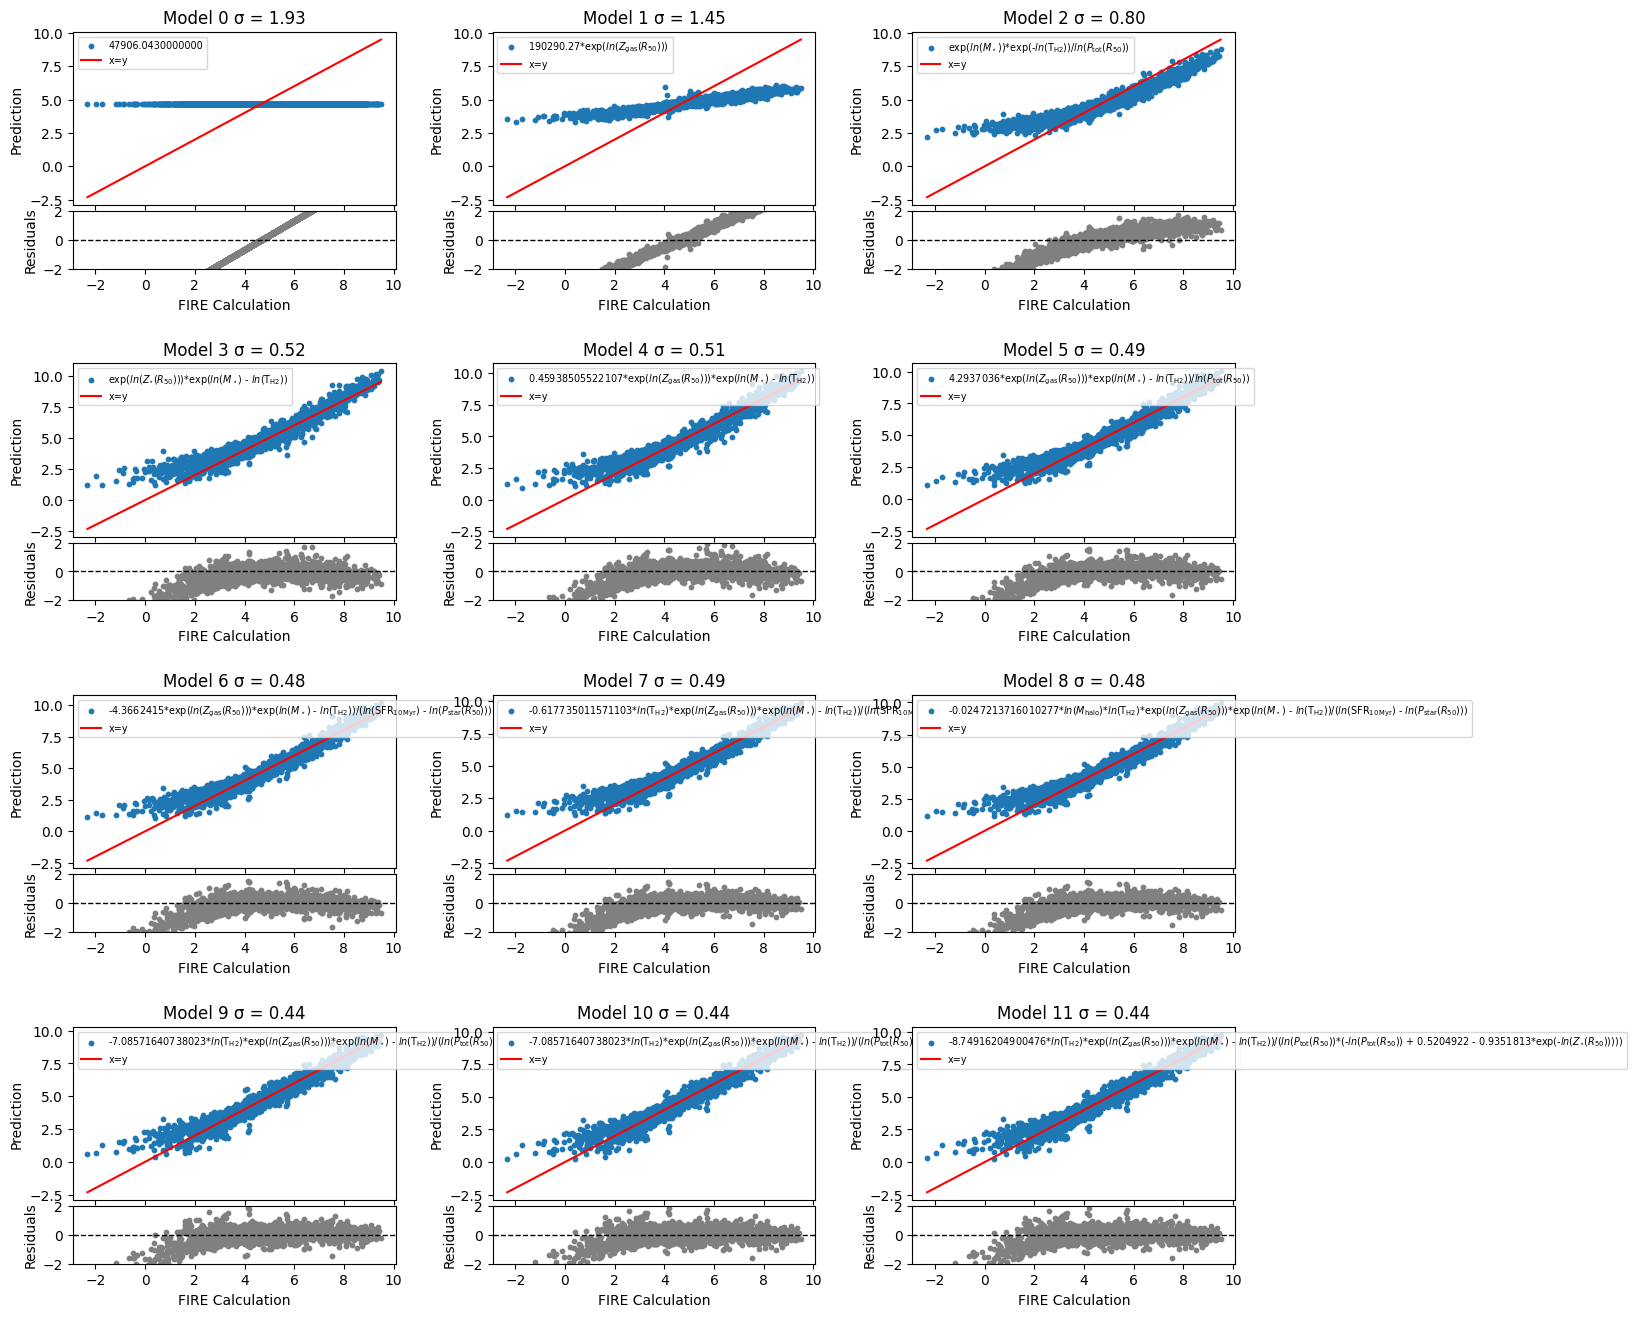

In [8]:
importlib.reload(symbollic_reg)

n_models = len(model.equations_)
ncols = 3
nrows = int(np.ceil(n_models / ncols))

fig = plt.figure(figsize=(5 * ncols, 4 * nrows), dpi=100)

outer = gridspec.GridSpec(nrows, ncols, wspace=0.3, hspace=0.4)

## Change this to make x and y scale log or linear
convert_to_log_scale = True

for i, model_number in enumerate(model.equations_.index):
    row, col = divmod(i, ncols)
    inner = gridspec.GridSpecFromSubplotSpec(
        2, 1, subplot_spec=outer[row, col], height_ratios=[3, 1], hspace=0.05
    )

    ax_main = plt.Subplot(fig, inner[0])
    ax_resid = plt.Subplot(fig, inner[1], sharex=ax_main)

    fig.add_subplot(ax_main)
    fig.add_subplot(ax_resid)

    symbollic_reg.plot_psyr_results(
        model=model,
        model_number=model_number,
        actual_y=y_data.values,
        X=X_data.values,
        ax_main=ax_main,
        ax_resid=ax_resid,
        x_columns=x_columns,
        x_vars=x_vars,
        convert_to_log_scale = convert_to_log_scale,
    )

plt.tight_layout()
plt.show()

In [9]:
# model.predict(X_data,1)

# model.equations_.iloc[1]['sympy_format']
# x_columns

# model.equations_['sympy_format']

model.latex(index=1, precision=2)

'e^{x_{0}} \\cdot 1.9 \\cdot 10^{5}'

In [10]:
pd.set_option("display.max_colwidth", None)

# Then simply:
print(model.equations_["equation"])

0                                                                                                47906.043
1                                                                                      exp(x0) * 190290.27
2                                                                                 (exp(x3) / x7) / exp(x9)
3                                                                                   exp(x1) * exp(x3 - x9)
4                                                                     (exp(x0) * exp(x3 - x9)) / 2.1768231
5                                                              exp(x3 - x9) * (exp(x0) / (x7 / 4.2937036))
6                                                      (exp(x3 - x9) * (exp(x0) * -4.3662415)) / (x2 - x6)
7                                               (((exp(x3 - x9) * x9) * exp(x0)) / -1.6188171) / (x2 - x6)
8                                         (((x9 * exp(x0)) / -40.45083) / (x2 - x6)) * (exp(x3 - x9) * x8)
9                    (((x9 * exp(x0))